# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# import numpy and pandas
import numpy as np 
import pandas as pd


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [4]:
# Run this code:

pokemon = pd.read_csv('pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [5]:
# Your code here:
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [6]:
# Your code here:
pokemon['Legendary'].value_counts()
# there are 65 legendary pokemons, and 735 non legendary ones. 


False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [15]:
# Your code here:
a = pokemon['Total'].groupby(pokemon['Legendary']).mean()
b = pokemon['Total'].groupby(pokemon['Legendary']).std()
a, b

(Legendary
 False    417.213605
 True     637.384615
 Name: Total, dtype: float64,
 Legendary
 False    106.760417
 True      60.937389
 Name: Total, dtype: float64)

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [72]:
# Your code here:
import scipy 
from scipy import stats

legendary= pokemon.query("Legendary==True")["Total"]
regular= pokemon.query("Legendary==False")["Total"]
regular


0      318
1      405
2      525
3      625
4      309
      ... 
787    494
788    304
789    514
790    245
791    535
Name: Total, Length: 735, dtype: int64

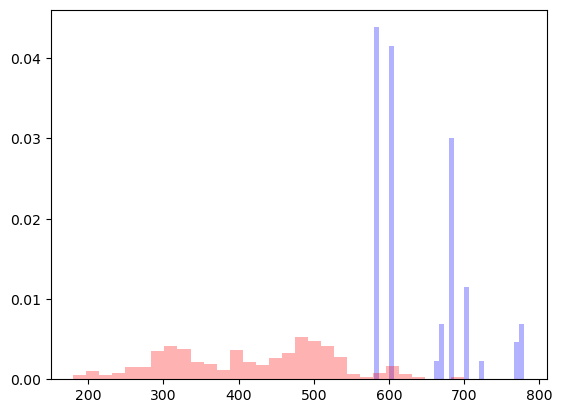

In [73]:
import matplotlib
from matplotlib import pyplot as plt

plt.hist(list(legendary), alpha=.3, color='blue', bins=30, density=True);
plt.hist(list(regular), alpha=.3, color='red', bins=30, density=True);



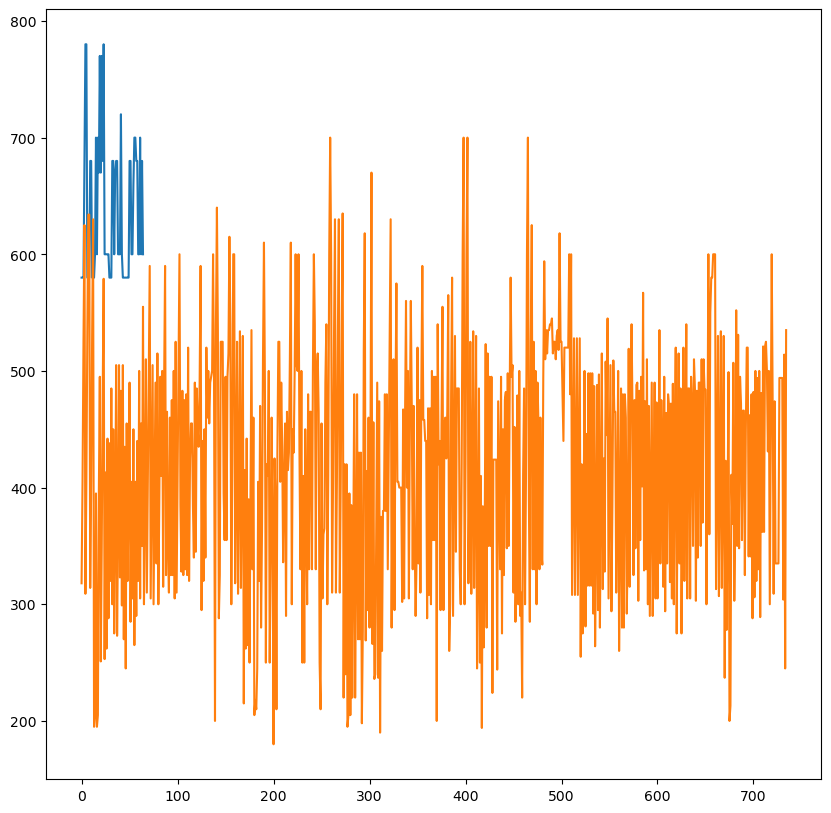

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,10))
plt.plot(list(legendary))
plt.plot(list(regular))

In [79]:
stats.ttest_ind(list(legendary), list(regular)).pvalue

3.0952457469652825e-52

What do you conclude from this test? Write your conclusions below.

In [6]:
# Your conclusions here:
# The p-value is very, very small (>50 zeros after decimal)
# so we can say with a 5% change of being wrong that these two series don't share the same mean ? 


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [80]:
# Your code here:
pokemon['Type 1'].value_counts()


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [103]:
# Your code here:
meanwater= pokemon.loc[pokemon['Type 1']=='Water']['Total'].mean()
meannotwater=pokemon.loc[pokemon['Type 1']!='Water']['Total'].mean()
stdwater= pokemon.loc[pokemon['Type 1']=='Water']['Total'].std()
stdnotwater=pokemon.loc[pokemon['Type 1']!='Water']['Total'].std()
meanwater, stdwater, meannotwater, stdnotwater

(430.45535714285717,
 113.18826606431458,
 435.85901162790697,
 121.09168230208066)

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [108]:
# hypothesis 0 is that their total points are distributed in the same way.
# so we need to use a ttest comparing the distribution of each of these series. 
# build the series 
water = list(pokemon.loc[pokemon['Type 1']=='Water']['Total'])
dry= list(pokemon.loc[pokemon['Type 1']!='Water']['Total'])
water, dry

[318,
 405,
 525,
 625,
 309,
 405,
 534,
 634,
 634,
 195,
 205,
 395,
 195,
 205,
 395,
 495,
 251,
 349,
 479,
 579,
 253,
 413,
 262,
 442,
 288,
 438,
 320,
 485,
 300,
 450,
 275,
 365,
 505,
 273,
 365,
 505,
 323,
 483,
 299,
 505,
 270,
 435,
 245,
 455,
 320,
 395,
 490,
 285,
 405,
 305,
 450,
 265,
 405,
 290,
 440,
 305,
 455,
 350,
 555,
 310,
 400,
 500,
 590,
 305,
 405,
 505,
 300,
 390,
 490,
 300,
 390,
 495,
 410,
 500,
 325,
 465,
 352,
 310,
 460,
 325,
 500,
 310,
 405,
 500,
 600,
 385,
 328,
 483,
 330,
 480,
 325,
 520,
 320,
 425,
 455,
 455,
 385,
 340,
 490,
 345,
 485,
 450,
 435,
 490,
 590,
 460,
 500,
 455,
 490,
 495,
 500,
 600,
 490,
 288,
 325,
 525,
 525,
 395,
 355,
 495,
 355,
 495,
 515,
 615,
 540,
 580,
 580,
 580,
 300,
 420,
 600,
 680,
 780,
 780,
 600,
 318,
 405,
 525,
 309,
 405,
 534,
 215,
 415,
 262,
 442,
 265,
 390,
 250,
 390,
 535,
 205,
 218,
 210,
 245,
 405,
 320,
 470,
 280,
 365,
 510,
 610,
 490,
 410,
 250,
 340,
 460,
 360

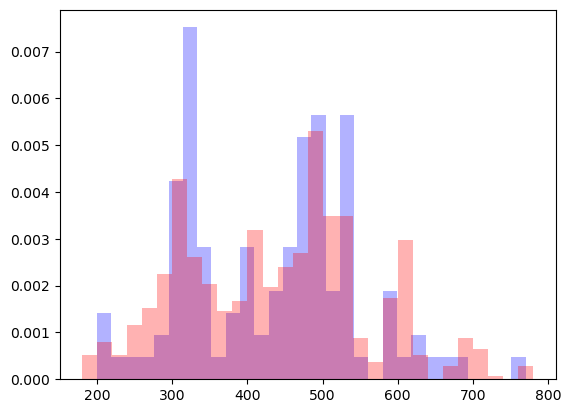

In [111]:
# plot them 
plt.hist(water, alpha=.3, color='blue', bins=30, density=True);
plt.hist(dry, alpha=.3, color='red', bins=30, density=True);

In [119]:
# perform the test 
stats.ttest_ind(water,dry, equal_var=True).pvalue
# equal variance is by default true in this function 

0.6587140317488793

Write your conclusion below.

In [10]:
# Your conclusions here:
# We can't, at this point, discard the hypothesis 
# that water pokemon points and non-water pokemon total points are distributed similarly.

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [116]:
# Your code here:
# Hypothesis that defense and attach scores are equal for each pokemon 
# actually it seems that the hypothesis is that every pokemon has the same attack and the same defense score 
# therefore the mean of all their attack-defense scores should be the same ? or the mean of each column should be the same ?
# test for the null hypothesis that two related or repeated samples have identical average (expected) values.

from scipy.stats import ttest_rel
defense= pokemon['Defense']
attack= pokemon['Attack']
defense, attack

ttest_rel(defense,attack).pvalue

1.7140303479358558e-05

Describe the results of the test in the cell below.

In [12]:
# Your conclusions here:
# If we consider the pvalue, it seems that attack and defense scores are not equal for each pokemon. 
# AND/OR it means that the mean of the 1st column is not the same as the mean of the 2nd column 
# couldn't we have done it with a function calculating whether Attack==Defense for each pokemon and then number of True ?
# probably not because this would be a sample of a total population which is unknown ? 

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [121]:
# Your code here:
spdefense= pokemon['Sp. Def']
spattack= pokemon['Sp. Atk']
spdefense, spattack

ttest_rel(spdefense, spattack).pvalue


0.3933685997548122

Describe the results of the test in the cell below.

In [14]:
# Your conclusions here:
# It seems we can't reject the hypothesis that Special Defense and Special Attack means are the same. 

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [122]:
# Your code here:
from scipy.stats import ttest_1samp
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [127]:
ttest_1samp(defense-attack, 0).pvalue
# result is small (5 decimals after 0.) 
# interestingly, it is the same result whether we write defense-attack or attack-defense
# So we reject the hypothesis, 
# the difference between the means of the two columns is not zero ?
# really not sure about my conclusions here :) 

1.7140303479358558e-05

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [133]:
# Your code here:
pd.crosstab(pokemon['Type 1']=='Water', pokemon["Legendary"])
# Note : Type 1 False = not water, True = Water 

Legendary,False,True
Type 1,,
False,627,61
True,108,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

In [134]:
# Your code here:
crosstab = stats.contingency.crosstab(pokemon['Type 1']=='Water', pokemon["Legendary"])
crosstab.count


array([[627,  61],
       [108,   4]])

In [135]:
stats.chi2_contingency(crosstab.count).pvalue

0.08625467249550949

Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:
# if the chi-2 test measures whether the variables are independent, here we have a chi-2 > to 0.05 
# so, we cannot, with a 95% confidence, reject the null hypothesis. 